<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

el indicador de esperanza de vida al nacer, de los hombres, por país, desde 1960. Los valores indican la cantidad de años que viviría un recién nacido si los patrones de mortalidad prevalecientes en el momento de su nacimiento fueran los mismos a lo largo de su vida. Dicha información está almacenada en el dataframe lifexp_male:

In [79]:
lifexp_male=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/LifeExpectancyMale.csv')
lifexp_male.head()
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1698423984078-Metadata.csv')

Gráficando un histograma con la expectativa de vida del año 2019, usando diferentes plataformas:

(array([ 5.,  5., 15., 23., 19., 39., 40., 41., 26., 31.]),
 array([51.081 , 54.1929, 57.3048, 60.4167, 63.5286, 66.6405, 69.7524,
        72.8643, 75.9762, 79.0881, 82.2   ]),
 <BarContainer object of 10 artists>)

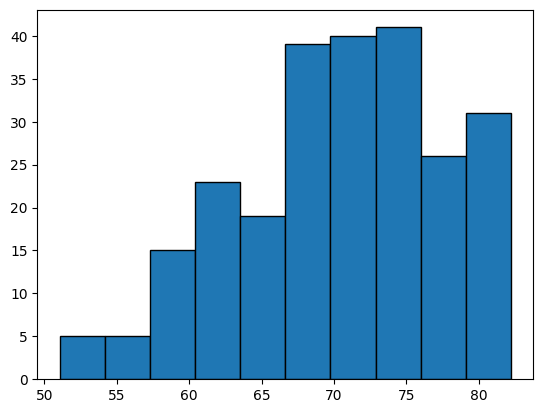

In [6]:
# con matplotlib
#plt.hist(lifexp_male['2019'])
#o
plt.hist('2019',data=lifexp_male,edgecolor='black')

<Axes: ylabel='Frequency'>

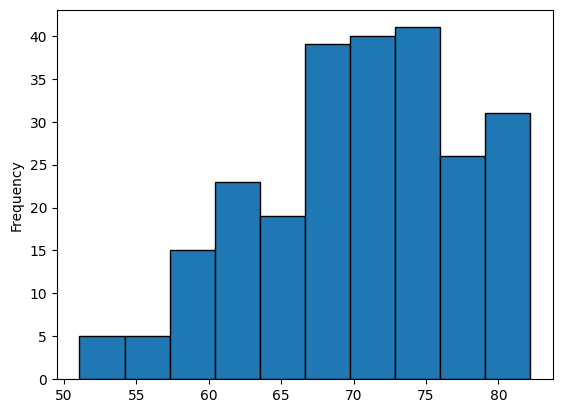

In [8]:
#con Pandas
lifexp_male['2019'].plot.hist(edgecolor='black')
#o
#lifexp_male['2019'].plot(kind='hist')

<Axes: xlabel='2019', ylabel='Count'>

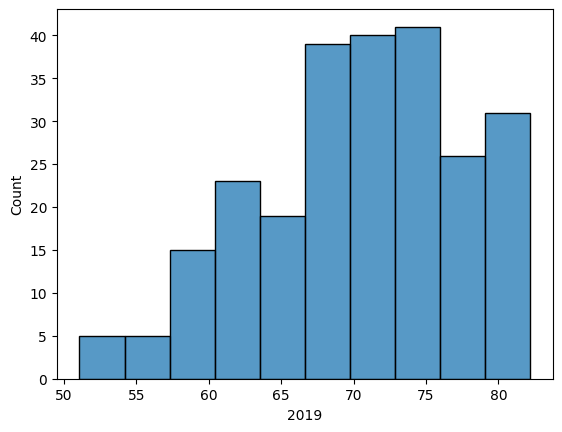

In [10]:
#con Seaborn
sns.histplot(x=lifexp_male['2019'])
#o
#sns.histplot(x='2019',data=lifexp_male)
##o
#sns.displot(kind='hist',x='2019',data=lifexp_male)
#Para eliminar las líneas de contorno se emplea el parámetro element='step'

Las clases dentro de los histogramas se pueden modifiacar con el parámetro: **bins=**, tanto de clases igualmente espaciadas como de clases espacialmente de manera irregular.

In [11]:
# bins =5

(array([10., 38., 58., 81., 57.]),
 array([51.081 , 57.3048, 63.5286, 69.7524, 75.9762, 82.2   ]),
 <BarContainer object of 5 artists>)

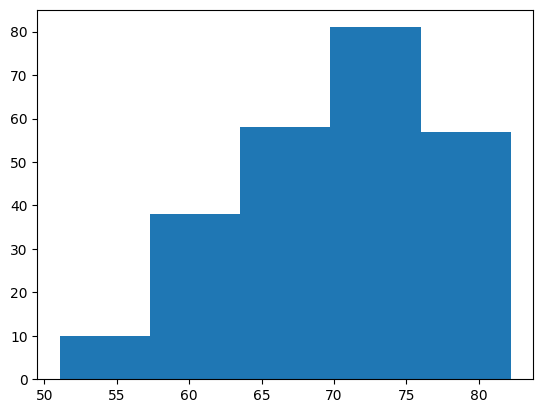

In [12]:
plt.hist('2019',data=lifexp_male,bins=5)

<Axes: ylabel='Frequency'>

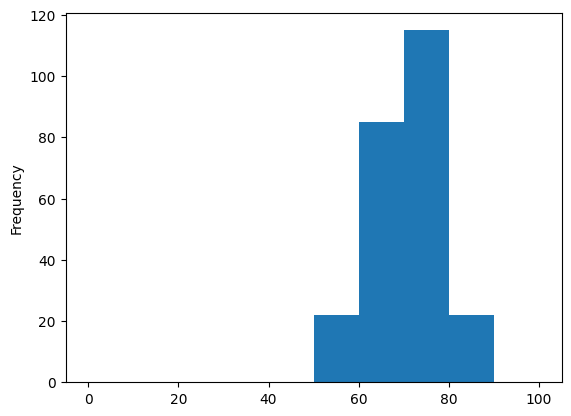

In [13]:
# especificando secuneca que defianna los bordes de las clases
lifexp_male['2019'].plot(kind='hist',bins=[0,10,20,30,40,50,60,70,80,90,100])

Las clases de este histograma van de [0,10), [10,20), [20,30), y así sucesivamente. El histograma obtenido muestra que la expectativa de vida en la mayoría de los países está entre los 70 y 80 años

Otros parámetros de utilidad: **range/binrange** y **cumulative**

(array([16., 12., 13., 16., 28., 30., 25., 25., 18., 19.]),
 array([60., 62., 64., 66., 68., 70., 72., 74., 76., 78., 80.]),
 <BarContainer object of 10 artists>)

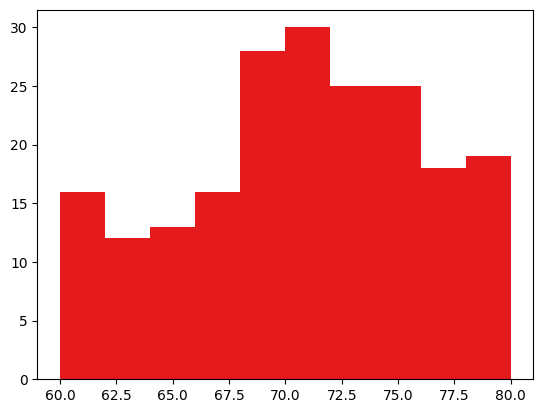

In [16]:
sns.set_palette('Set1')
plt.hist('2019',data=lifexp_male,range=(60,80))
#Establece el límite inferior y superior a considerar.
#Los valores fuera de este rango se ignoran

<Axes: ylabel='Frequency'>

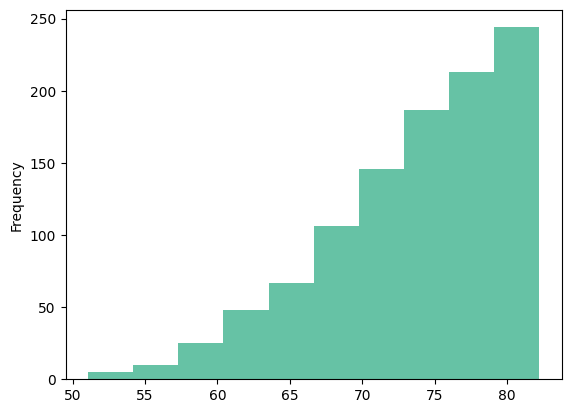

In [17]:
#cumulative aplica en las tres
sns.set_palette('Set2')
lifexp_male['2019'].plot(kind='hist',cumulative=True)

# Varios histogramas en la misma figura
Ahora vamos a comparar el año 1960 y 2019

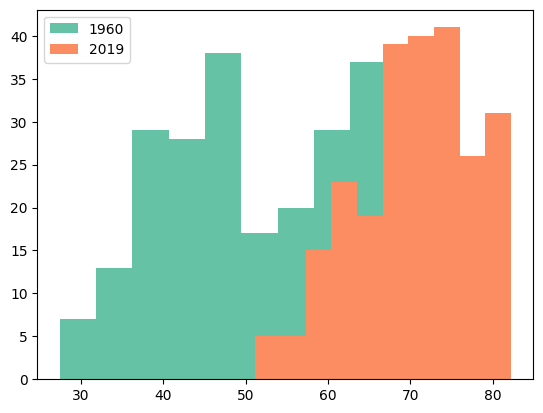

In [18]:
plt.hist('1960',data=lifexp_male,label='1960')
plt.hist('2019',data=lifexp_male,label='2019')
plt.legend()

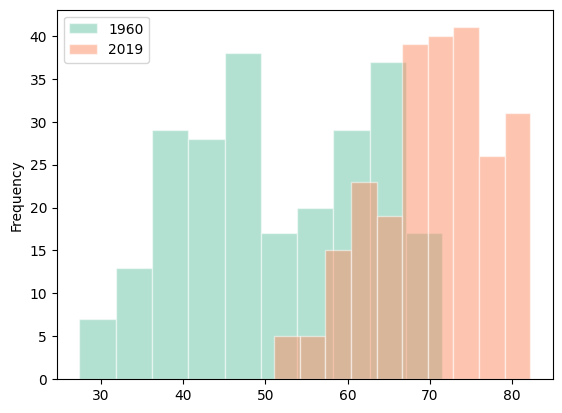

In [78]:
# con Pandas
lifexp_male['1960'].plot.hist(label='1960',alpha=0.5,edgecolor='white')
#r=[lifexp_male['2019'].min()]
#[r.append(r[i-1]+3.1119) for i in range(1,10)]
#plt.xticks(r)
lifexp_male['2019'].plot.hist(label='2019',alpha=0.5,edgecolor='white')
#t=[lifexp_male['2019'].min()]
#[t.append(t[i-1]+3.1119) for i in range(1,10)]
#plt.xticks(t)
plt.legend()

<Axes: ylabel='Frequency'>

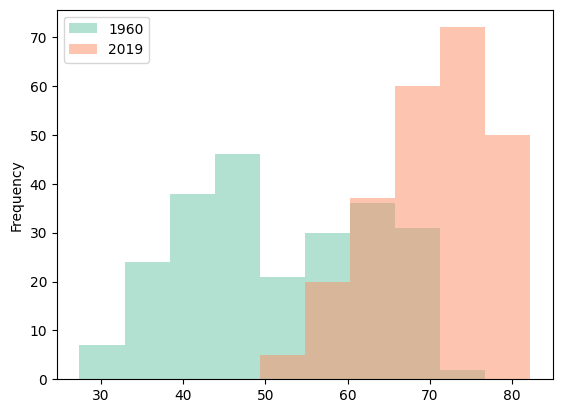

In [73]:
lifexp_male[['1960','2019']].plot.hist(alpha=0.5)

como se puede ver en ambas gráficas de los histogramas  creadas con Pandas, hay diferencias significantes respecto a su Frecuencias

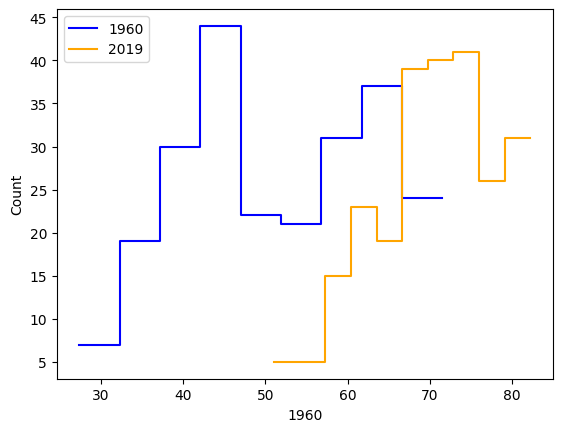

In [20]:
# con Seaborn
sns.histplot(x='1960',data=lifexp_male,color='blue',label='1960',element='step',fill=False)
sns.histplot(x='2019',data=lifexp_male,color='orange',label='2019',element='step',fill=False)
plt.legend()

## Columnas con grupos separados
si se combina el dataframe lifexp_male con el contenido del archivo Metadata.csv, leído en un dataframe con el mismo nombre (metadata), cada país en el indicador estaría asociado a una región (Region) y a un grupo de ingresos (IncomeGroup).

In [80]:
merged_df = lifexp_male.merge(metadata,on='Country Code')

In [81]:
merged_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,64.084,64.429,64.747,65.053,65.356,65.660,65.959,66.242,...,73.069,73.208,73.348,73.488,73.628,73.768,Latin America & Caribbean,High income,NaN,Aruba
1,Afghanistan,AFG,31.718,32.224,32.724,33.216,33.700,34.180,34.656,35.133,...,61.563,61.965,62.343,62.701,63.047,63.382,South Asia,Low income,NaN,Afghanistan
2,Angola,AGO,36.305,36.582,36.874,37.181,37.501,37.833,38.177,38.532,...,56.140,56.737,57.242,57.677,58.064,58.416,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,Albania,ALB,61.309,62.272,63.117,63.811,64.346,64.723,64.962,65.116,...,75.734,76.066,76.353,76.601,76.816,77.002,Europe & Central Asia,Upper middle income,NaN,Albania
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income,NaN,Andorra


sería interesante conocer la distribución del indicador por grupo de ingresos

array([[<Axes: title={'center': 'High income'}>,
        <Axes: title={'center': 'Low income'}>],
       [<Axes: title={'center': 'Lower middle income'}>,
        <Axes: title={'center': 'Upper middle income'}>]], dtype=object)

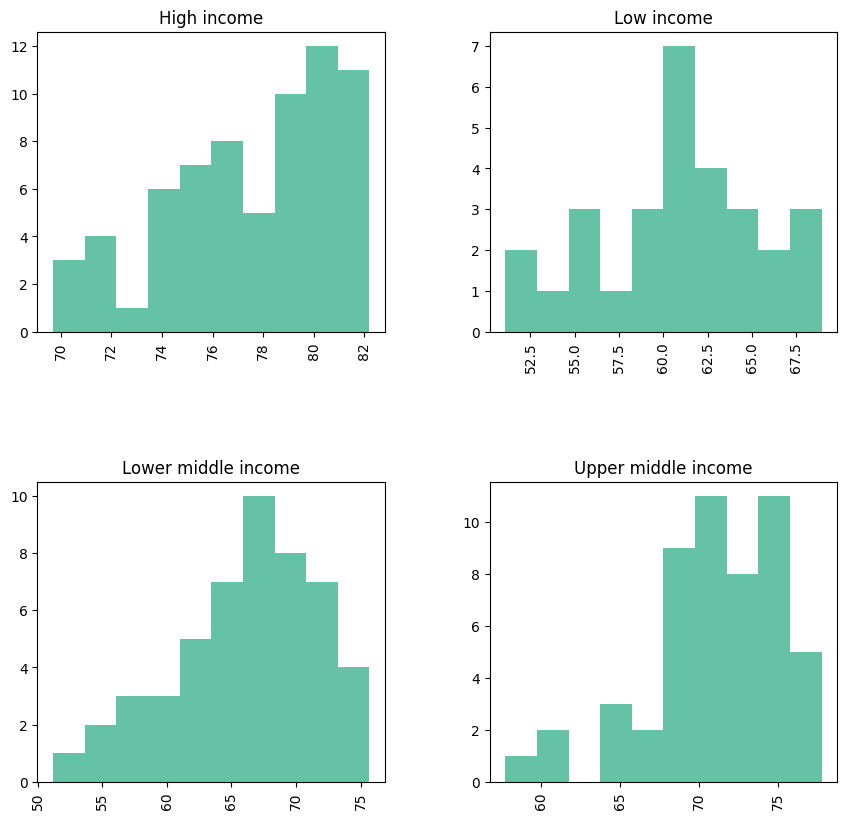

In [82]:
merged_df['2019'].hist(by=merged_df['IncomeGroup'],figsize=(10,10))

también se puede hacer con Seabor, solo que los da en un mismo grafico:

<Axes: xlabel='2019', ylabel='Count'>

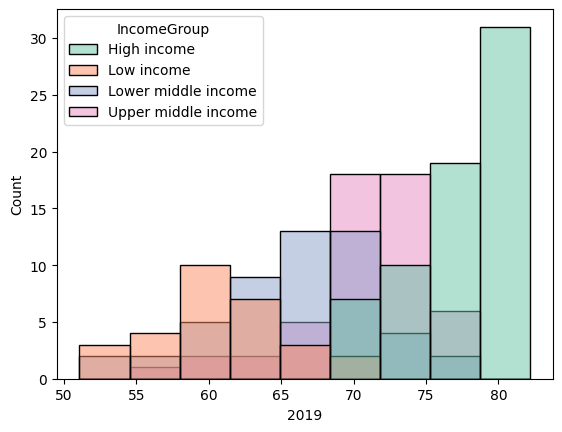

In [86]:
sns.histplot(x='2019',data=merged_df,hue='IncomeGroup')

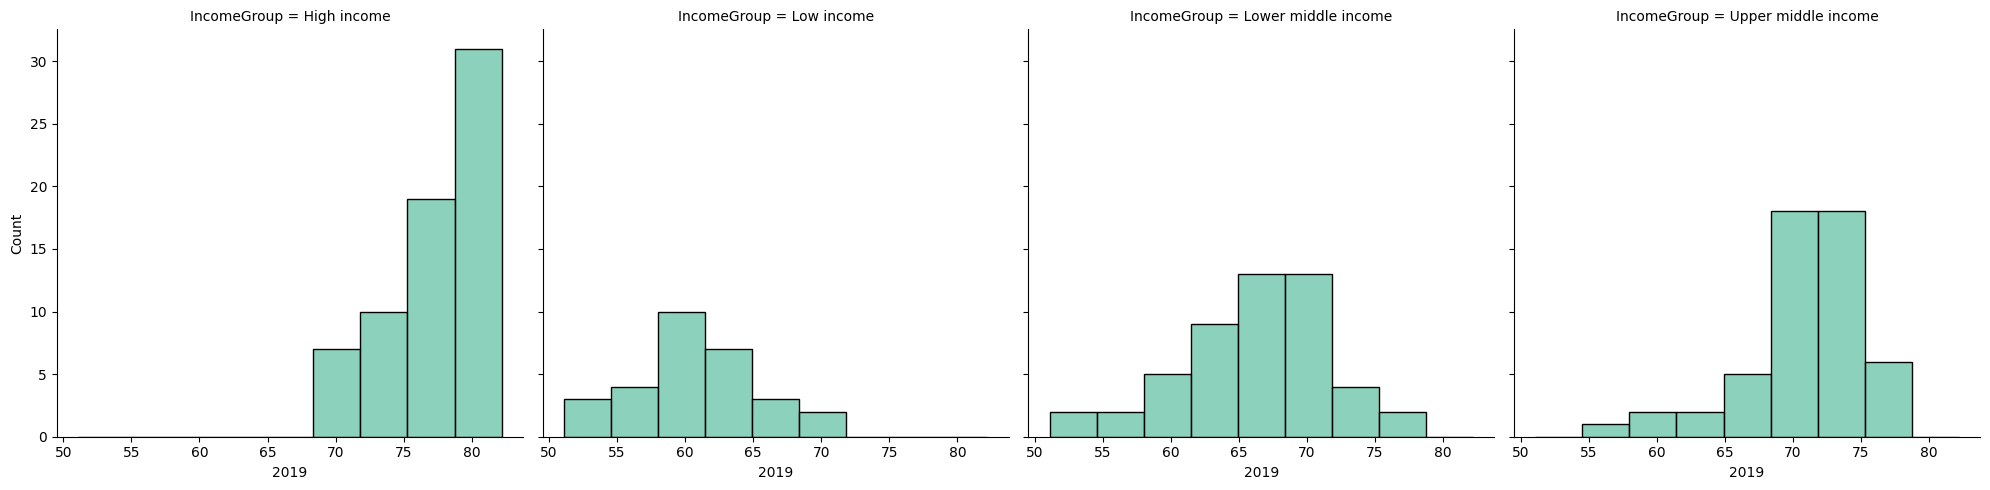

In [87]:
#si las queremos separadas
sns.displot(kind='hist',x='2019',col='IncomeGroup',data=merged_df)

# Boxplot

In [88]:
(88.1-55.5)/6

5.433333333333333